![Credit card being held in hand](credit_card.jpg)

Commercial banks receive _a lot_ of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this workbook, you will build an automatic credit card approval predictor using machine learning techniques, just like real banks do.

# The Data

The data is a small subset of the Credit Card Approval dataset from the UCI Machine Learning Repository showing the credit card applications a bank receives. This dataset has been loaded as a `pandas` DataFrame called `cc_apps`. The last column in the dataset is the target value.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# Load the dataset
cc_apps = pd.read_csv("D:\Codes\Q1_Machine_Learning_Repo\datasets\datacamp_creditcard_prj\cc_approvals.data", header=None) 


<>:11: SyntaxWarning: invalid escape sequence '\C'
<>:11: SyntaxWarning: invalid escape sequence '\C'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17052\934644877.py:11: SyntaxWarning: invalid escape sequence '\C'
  cc_apps = pd.read_csv("D:\Codes\Q1_Machine_Learning_Repo\datasets\datacamp_creditcard_prj\cc_approvals.data", header=None)


In [3]:
display(cc_apps)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,g,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,g,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,g,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,g,750,-


# General guide

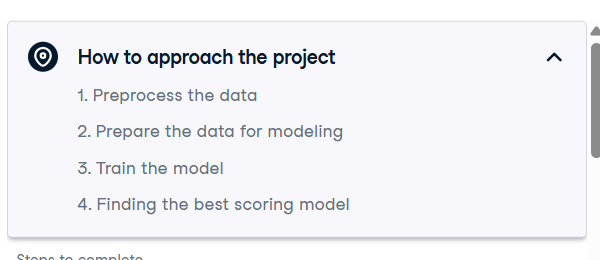

# 1. EDA/Check data is null

## 1.1: Remove "?" 

In [4]:
# Replace ? across the DataFrame with NaN
cc_apps = cc_apps.replace('?', np.nan)

In [5]:
# Display the dataframe post conversion
display(cc_apps)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,g,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,g,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,g,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,g,750,-


## 1.2: Fill NaN/Imputation

### 1.2.0: Re-check column types

In [6]:
display(cc_apps.dtypes)

0      object
1      object
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12      int64
13     object
dtype: object

In [7]:
cc_apps[1] = cc_apps[1].astype('Float64')

In [8]:
cc_apps[7] = cc_apps[7].astype('Float64')

In [9]:
display(cc_apps.dtypes)

0      object
1     Float64
2     float64
3      object
4      object
5      object
6      object
7     Float64
8      object
9      object
10      int64
11     object
12      int64
13     object
dtype: object

### 1.2.1: Fill NaN -> mean for numeric columns

In [10]:
cc_apps = cc_apps.fillna(
    cc_apps.mean(numeric_only=True)
)

### 1.2.2: Fill Nan -> mode for non-numeric columns

In [11]:
for column in cc_apps.select_dtypes(include='object'):
    cc_apps[column] = cc_apps[column].fillna(cc_apps[column].mode()[0])

In [12]:
display(cc_apps)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
2,a,24.5,0.500,u,g,q,h,1.5,t,f,0,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,g,0,-
686,a,22.67,0.750,u,g,c,v,2.0,f,t,2,g,394,-
687,a,25.25,13.500,y,p,ff,ff,2.0,f,t,1,g,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,g,750,-


In [13]:
display(cc_apps[10].describe())

count    690.00000
mean       2.40000
std        4.86294
min        0.00000
25%        0.00000
50%        0.00000
75%        3.00000
max       67.00000
Name: 10, dtype: float64

## 1.3: One-hot encoding for all-non numeric columns

In [14]:
cc_apps = pd.get_dummies(
    cc_apps,
    columns=[0,3,4,5,6,8,9,11],
    drop_first=True
)

In [15]:
display(cc_apps)

,1,2,7,10,12,13,0_b,3_u,3_y,4_gg,...,6_h,6_j,6_n,6_o,6_v,6_z,8_t,9_t,11_p,11_s
0,30.83,0.000,1.25,1,0,+,True,True,False,False,...,False,False,False,False,True,False,True,True,False,False
1,58.67,4.460,3.04,6,560,+,False,True,False,False,...,True,False,False,False,False,False,True,True,False,False
2,24.5,0.500,1.5,0,824,+,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
3,27.83,1.540,3.75,5,3,+,True,True,False,False,...,False,False,False,False,True,False,True,True,False,False
4,20.17,5.625,1.71,0,0,+,True,True,False,False,...,False,False,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,1.25,0,0,-,True,False,True,False,...,True,False,False,False,False,False,False,False,False,False
686,22.67,0.750,2.0,2,394,-,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
687,25.25,13.500,2.0,1,1,-,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
688,17.92,0.205,0.04,0,750,-,True,True,False,False,...,False,False,False,False,True,False,False,False,False,False


# 2. Prepare data for ML

## 2.1: Define X and y

In [16]:
# Features value is everything column 13
X = cc_apps.drop([13], axis=1)

# Feature target is column 13
y = cc_apps[13]

In [17]:
display(X)

,1,2,7,10,12,0_b,3_u,3_y,4_gg,4_p,...,6_h,6_j,6_n,6_o,6_v,6_z,8_t,9_t,11_p,11_s
0,30.83,0.000,1.25,1,0,True,True,False,False,False,...,False,False,False,False,True,False,True,True,False,False
1,58.67,4.460,3.04,6,560,False,True,False,False,False,...,True,False,False,False,False,False,True,True,False,False
2,24.5,0.500,1.5,0,824,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,27.83,1.540,3.75,5,3,True,True,False,False,False,...,False,False,False,False,True,False,True,True,False,False
4,20.17,5.625,1.71,0,0,True,True,False,False,False,...,False,False,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,1.25,0,0,True,False,True,False,True,...,True,False,False,False,False,False,False,False,False,False
686,22.67,0.750,2.0,2,394,False,True,False,False,False,...,False,False,False,False,True,False,False,True,False,False
687,25.25,13.500,2.0,1,1,False,False,True,False,True,...,False,False,False,False,False,False,False,True,False,False
688,17.92,0.205,0.04,0,750,True,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [18]:
display(y)

0      +
1      +
2      +
3      +
4      +
      ..
685    -
686    -
687    -
688    -
689    -
Name: 13, Length: 690, dtype: object

## 2.2: Split into train test split                    

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [20]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)


## 2.3: Scaling data

In [21]:
# Create a StandardScaler object
scaler = StandardScaler()

# Scale training data
X_train = scaler.fit_transform(X_train)

# Scale_testing_data
X_test= scaler.fit_transform(X_test)

# 3. Build a model

## 3.1: Initialize a model

In [22]:
from sklearn.linear_model import LogisticRegressionCV

In [23]:
cc_approve_model = LogisticRegressionCV(
    cv=10,
    max_iter = 100
)

## 3.2: Fit data

In [24]:
cc_approve_model.fit(X_train, y_train)

,Cs,10
,fit_intercept,True
,cv,10
,dual,False
,penalty,'l2'
,scoring,None
,solver,'lbfgs'
,tol,0.0001
,max_iter,100
,class_weight,None
,n_jobs,None


### 3.2.2: Predict based on testing data

In [25]:
y_pred = cc_approve_model.predict(X_test)

## 3.3: Evaluating model:

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           +       0.87      0.85      0.86        96
           -       0.88      0.89      0.88       111

    accuracy                           0.87       207
   macro avg       0.87      0.87      0.87       207
weighted avg       0.87      0.87      0.87       207



## 3.4: Print feature importances (a sort of heatmap post model)

In [28]:
feature_importance = pd.Series(cc_approve_model.coef_[0], index=X.columns)
print(feature_importance.sort_values(ascending=False))


5_ff    0.174400
6_z     0.168540
6_ff    0.152305
5_i     0.143181
5_j     0.118709
5_d     0.112713
5_k     0.097657
3_y     0.094762
4_p     0.094762
6_n     0.050669
5_m     0.044264
0_b     0.019334
6_o     0.000000
5_q    -0.000453
6_dd   -0.025202
6_v    -0.035072
5_r    -0.055757
2      -0.064142
5_c    -0.066439
6_h    -0.076595
3_u    -0.079068
1      -0.100280
5_e    -0.110912
11_s   -0.112386
6_j    -0.133471
5_cc   -0.134650
5_w    -0.136703
4_gg   -0.148826
7      -0.196532
5_x    -0.199655
12     -0.275662
11_p   -0.276383
9_t    -0.404550
10     -0.413814
8_t    -1.069170
dtype: float64
